In [42]:
import matplotlib.pyplot as plt
import os
import pickle
from ipywidgets import interact
from utils import SizeVideo,compute_trajectory
import scipy.io as sio
from utils import mat2pickle


# Segmentation and Playbacks plots from .mat files


The following is a demo on how to convert .mat files obtained from Main_segmentation.m and display playbacks and segmentation results.

### References
[1] Lohscheller, J., Eysholdt, U., Toy, H., & Dollinger, M. (2008). Phonovibrography: mapping high-speed movies of vocal fold vibrations into 2-D diagrams for visualizing and analyzing the underlying laryngeal dynamics. IEEE transactions on medical imaging, 27(3), 300-309.

[2] Karakozoglou, S. Z., Henrich, N., d’Alessandro, C., & Stylianou, Y. (2012). Automatic glottal segmentation using local-based active contours and application to glottovibrography. Speech Communication, 54(5), 641-654.

### Convert .mat to pkl

In [43]:
main_folder='./Playback_code'
output_picklefile=os.path.join(main_folder,'segmentation.pkl')
data = os.path.join(main_folder,'segmentation.mat')
mat2pickle(data,output_picklefile)

main_folder='./Playback_code'
output_picklefile=os.path.join(main_folder,'trajectory.pkl')
data = os.path.join(main_folder,'trajectory.mat')
mat2pickle(data,output_picklefile)

main_folder='./Playback_code'
output_picklefile=os.path.join(main_folder,'playbacks.pkl')
data = os.path.join(main_folder,'playbacks.mat')
mat2pickle(data,output_picklefile)

Data successfully saved to ./Playback_code/segmentation.pkl
Data successfully saved to ./Playback_code/trajectory.pkl
Data successfully saved to ./Playback_code/playbacks.pkl


### Load and display segmentation results 

In [44]:
with open(os.path.join(main_folder,'segmentation.pkl'), 'rb') as pickle_file:
    segmentation=pickle.load(pickle_file)

In [45]:
video=segmentation['mask']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))
    

interactive(children=(IntSlider(value=250, description='frame', max=500), Output()), _dom_classes=('widget-int…

In [46]:
video=segmentation['contours']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=250, description='frame', max=500), Output()), _dom_classes=('widget-int…

### Load and display trajectories and playbacks results 

In [47]:
with open(os.path.join(main_folder,'trajectory.pkl'), 'rb') as pickle_file:
    trajectory=pickle.load(pickle_file)

with open(os.path.join(main_folder,'playbacks.pkl'), 'rb') as pickle_file:
    playbacks=pickle.load(pickle_file)

### Vocal Fold Trajectories 

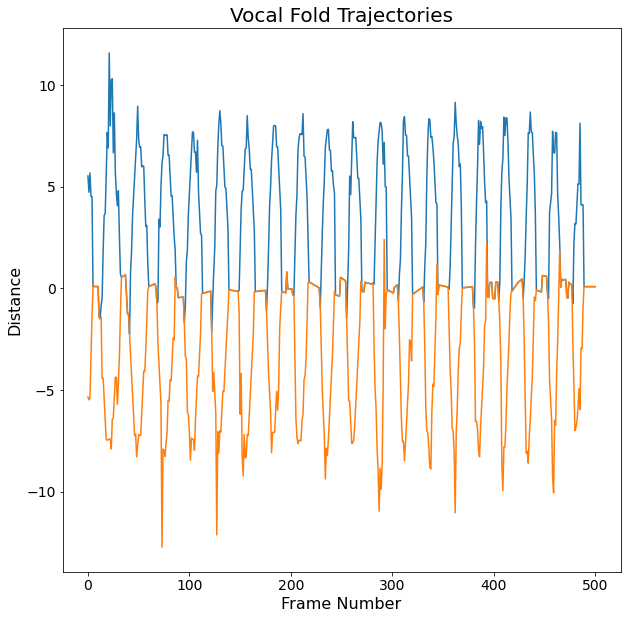

In [48]:
plt.figure(figsize=(10,10))
# Plotting the data
plt.plot(trajectory['VFL_dis'][0,:])
plt.plot(trajectory['VFR_dis'][0,:])

# Adding title and labels with increased font size
plt.title('Vocal Fold Trajectories', fontsize=20)
plt.xlabel('Frame Number', fontsize=16)
plt.ylabel('Distance', fontsize=16)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()


In [84]:
video=trajectory['Video_traj']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.yticks([])
    plt.xticks([])
    plt.imshow(video[0,n_frame][0],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=250, description='frame', max=500), Output()), _dom_classes=('widget-int…

### Vocal Folds Playbacks

Text(-10, 0, 'A')

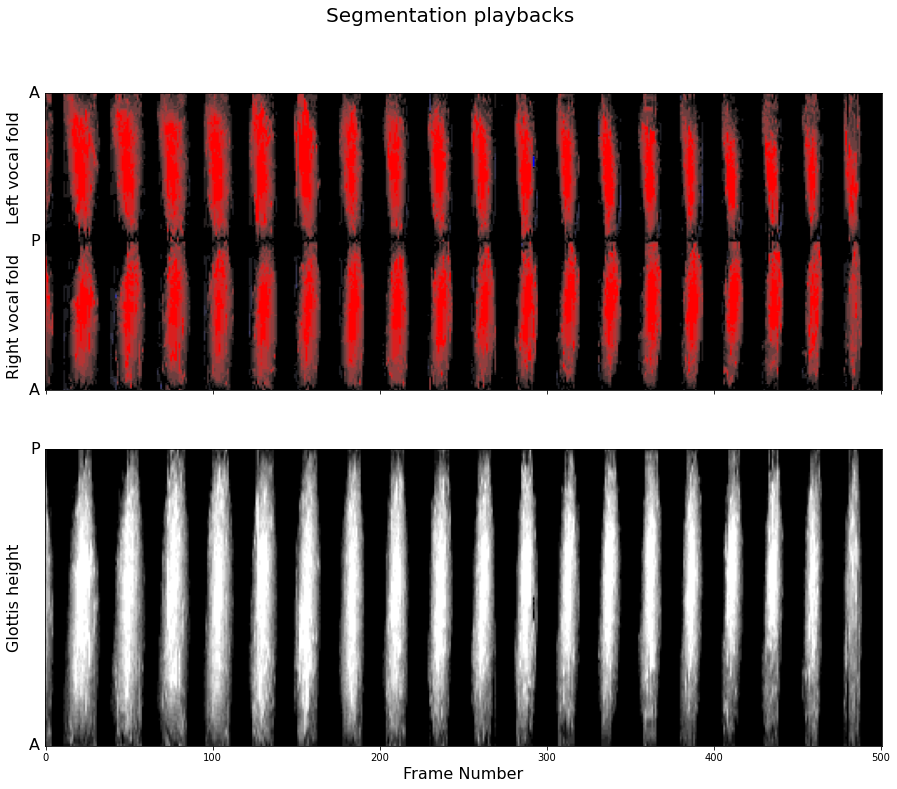

In [31]:
fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(15,12))
fig.suptitle('Segmentation playbacks', fontsize=20)
plt.xlabel('Frame Number', fontsize=16)
axs[0].imshow(playbacks['lrpvgColor'],cmap='gray',aspect='auto')
axs[1].imshow(playbacks['glpvg'],cmap='gray',aspect='auto')
axs[0].set_yticks([])
axs[1].set_yticks([])
# Add custom y-axis labels to axs[0]
axs[0].annotate('A', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Left vocal fold', xy=(0, 0.75), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('P', xy=(0, 0.5), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Right vocal fold', xy=(0, 0.25), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)


# Add custom y-axis labels to axs[0]
axs[1].annotate('P', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[1].annotate('Glottis height', xy=(0, 0.5), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[1].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
